In [ ]:
# Wine Quality Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

In [1]:
import kagglehub

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 1.11MB/s]

Extracting files...
Path to dataset files: C:\Users\Batia\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['WineQT.csv']


In [4]:
df = pd.read_csv(path+"\WineQT.csv"); df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Confusion matrix:
 [[ 0  3  3  0  0]
 [ 0 73 23  0  0]
 [ 0 30 63  6  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]
Accuracy score: 0.6681222707423581


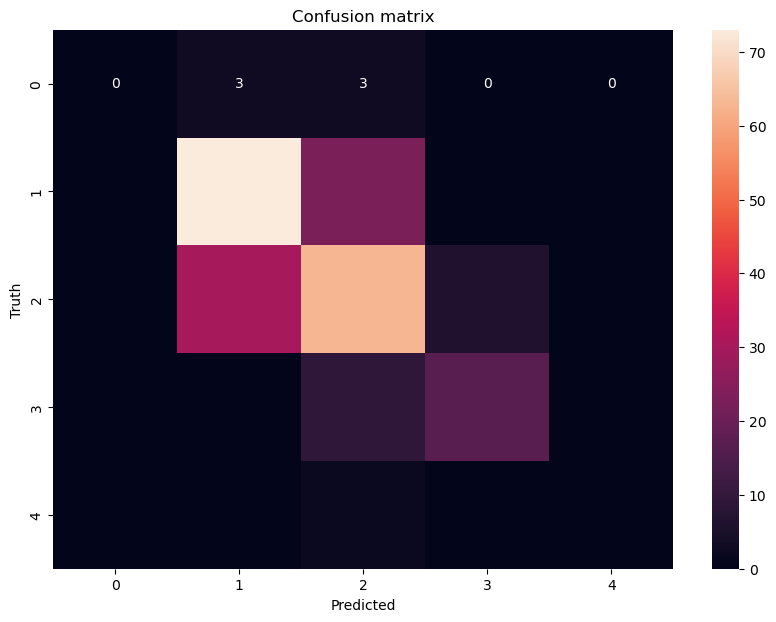

In [5]:
X = df.drop('quality', axis=1)
y = df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print("Accuracy score:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')
plt.show()



In [ ]:
# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [3]:
movies_df = pd.read_csv(r"C:\Users\Batia\Downloads\ml-32m\ml-32m\movies.csv")

In [8]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_df = pd.read_csv(r"C:\Users\Batia\Downloads\ml-32m\ml-32m\ratings.csv")

In [10]:
df1.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [4]:
tags_df = pd.read_csv(r"C:\Users\Batia\Downloads\ml-32m\ml-32m\tags.csv")

In [12]:
df2.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


In [25]:
df2['tag'].value_counts()

tag
sci-fi                     10996
atmospheric                 9589
action                      8473
comedy                      8139
funny                       7467
                           ...  
bad behavior                   1
apache junction arizona        1
advent calendar                1
adult hitting a child          1
Clemence Poesy                 1
Name: count, Length: 140979, dtype: int64

In [28]:
df2['tag'] = df2['tag'].str.lower()
df2['tags'] = df2.groupby('movieId')['tag'].apply(lambda x: ', '.join(x))

TypeError: sequence item 442: expected str instance, float found

In [5]:
links_df = pd.read_csv(r"C:\Users\Batia\Downloads\ml-32m\ml-32m\links.csv")

In [14]:
df3.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
df4 = df.merge(df1, on='movieId', how='inner')

In [23]:
df4.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,2.5,1169265231
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,3.0,850085076
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.0,1027305751
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,974704488
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,5.0,1553184230


In [24]:
print(df[df['movieId'] == 1])
print(df1[df1['movieId'] == 1])

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
          userId  movieId  rating   timestamp
559           10        1     2.5  1169265231
1219          11        1     3.0   850085076
1733          17        1     4.0  1027305751
1957          19        1     3.0   974704488
2004          20        1     5.0  1553184230
...          ...      ...     ...         ...
31998476  200938        1     4.5  1305857133
31998887  200943        1     3.5  1274577920
31999478  200944        1     4.0  1454247529
31999907  200947        1     4.0  1495973163
31999968  200948        1     5.0  1203438216

[68997 rows x 4 columns]


In [7]:
merged_df = pd.merge(ratings_df, movies_df, on="movieId", how="inner")

In [8]:
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,3,17,5.0,1084485217,Sense and Sensibility (1995),Drama|Romance
2,15,17,4.5,1289858271,Sense and Sensibility (1995),Drama|Romance
3,28,17,4.0,961513829,Sense and Sensibility (1995),Drama|Romance
4,29,17,4.0,845056111,Sense and Sensibility (1995),Drama|Romance
